In [1]:
import json

with open('/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-12/14-20-53/results.json') as f:
    results = json.load(f)

top_k = int(results["top_k"])
results = results["results"]

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(3, top_k)
    fig.set_size_inches(10, 4)
    labels = ["lrg", "mdm", "sml"]
    for i, ax in enumerate(axes.flatten()):
        label = labels[i // top_k]
        image = plt.imread(features[label][i % top_k][0])
        label = float(features[label][i % top_k][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none') 
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    if pair["feature"]:
        print("\nTop-n images with largest absolute values of logits:")
        plot_instances(pair["feature"])
    print(120 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. rotate: 0.1681
	2. angle: 0.1524
	3. no: 0.1455
	4. triangular: 0.1427
	5. shade: 0.1087
	6. four: 0.1004
	7. red: 0.0978
	8. bottom: 0.0957
	9. corner: 0.0940
	10. crimson: 0.0913
	11. circular: 0.0877
	12. picture: 0.0762
	13. right: 0.0730
	14. ruby: 0.0707
	15. position: 0.0684
	16. canvas: 0.0682
	17. solid: 0.0647
	18. locate: 0.0618
	19. unrotate: 0.0608
	20. scarlet: 0.0603
	21. white: 0.0552
	22. photo: 0.0502
	23. navy: 0.0492
	24. fix: 0.0468
	25. it: 0.0452
	26. form: 0.0436
	27. unturn: 0.0430
	28. blank: 0.0430
	29. fern: 0.0427
	30. transparent: 0.0423
	31. figure: 0.0422
	32. static: 0.0333
	33. quadratic: 0.0323
	34. cyan: 0.0316
	35. cherry: 0.0296
	36. color: 0.0276
	37. background: 0.0248
	38. lapis: 0.0224
	39. blue: 0.0167
	40. turn: 0.0156
	41. up: 0.0136
	42. emerald: 0.0127
	43. olive: 0.0078
	44. left: 0.0030
	45. azure: 0.0018
	46. round: 0.0015
	47. lime: 0.0013
	48. image: 0.0011
	49. green: 0.000

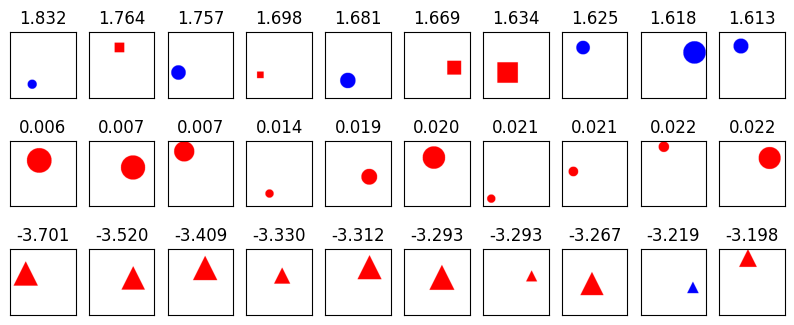

------------------------------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. form: 0.1874
	2. locate: 0.0964
	3. three: 0.0660
	4. emerald: 0.0597
	5. fern: 0.0580
	6. shape: 0.0571
	7. cyan: 0.0474
	8. it: 0.0428
	9. ruby: 0.0402
	10. up: 0.0399
	11. static: 0.0379
	12. position: 0.0331
	13. bottom: 0.0313
	14. transparent: 0.0224
	15. no: 0.0188
	16. circular: 0.0174
	17. shade: 0.0166
	18. olive: 0.0153
	19. rotate: 0.0148
	20. solid: 0.0145
	21. unturn: 0.0137
	22. crimson: 0.0096
	23. blank: 0.0095
	24. unrotate: 0.0091
	25. figure: 0.0070
	26. white: 0.0055
	27. fix: 0.0029
	28. angle: 0.0029
	29. blue: 0.0027
	30. turn: 0.0016
	31. picture: 0.0011
	32. background: 0.0011
	33. lapis: 0.0011
	34. photo: 0.0010
	35. right: 0.0007
	36. triangular: 0.0005
	37. round: 0.0003
	38. left: 0.0001
	39. color: 0.0000
	40. green: 0.0000
	41. azure: 0.0000
	42. quadratic: 0.0000
	43. four:

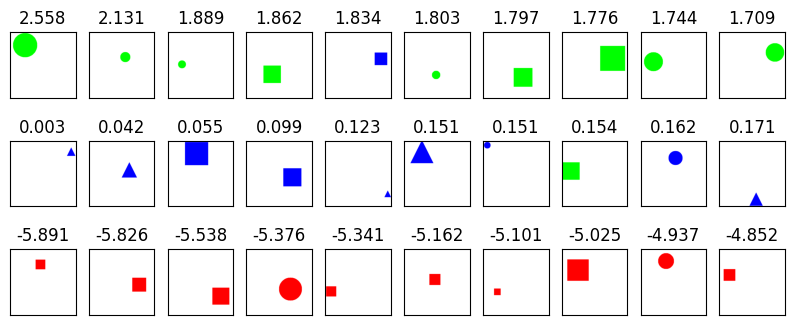

------------------------------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. lapis: 0.1863
	2. blue: 0.1447
	3. triangular: 0.1429
	4. angle: 0.1255
	5. cyan: 0.1239
	6. quadratic: 0.1221
	7. corner: 0.1154
	8. azure: 0.1104
	9. four: 0.0991
	10. navy: 0.0936
	11. ruby: 0.0609
	12. bottom: 0.0493
	13. rotate: 0.0479
	14. round: 0.0377
	15. unturn: 0.0311
	16. crimson: 0.0297
	17. shade: 0.0276
	18. position: 0.0243
	19. scarlet: 0.0192
	20. right: 0.0189
	21. picture: 0.0164
	22. it: 0.0145
	23. locate: 0.0144
	24. background: 0.0130
	25. figure: 0.0105
	26. transparent: 0.0096
	27. left: 0.0095
	28. color: 0.0055
	29. form: 0.0052
	30. up: 0.0051
	31. white: 0.0037
	32. fix: 0.0019
	33. lime: 0.0012
	34. fern: 0.0011
	35. static: 0.0009
	36. solid: 0.0003
	37. circular: 0.0000
	38. cherry: 0.0000
	39. olive: 0.0000
	40. red: 0.0000
	41. emerald: 0.0000
	42. green: 0.0000
	43. <pad>

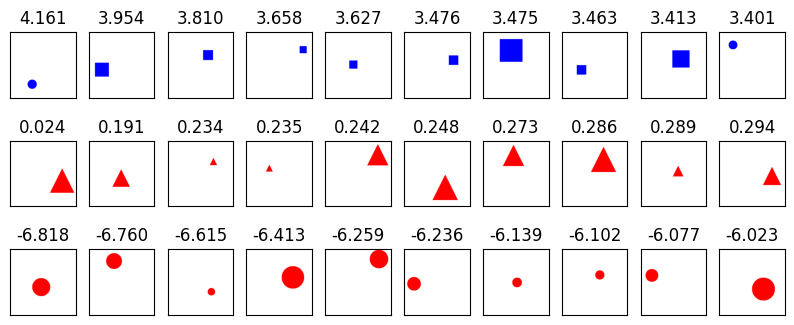

------------------------------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. triangular: 0.2421
	2. four: 0.2115
	3. angle: 0.1972
	4. quadratic: 0.1930
	5. corner: 0.1219
	6. lapis: 0.1083
	7. rotate: 0.0995
	8. bottom: 0.0989
	9. navy: 0.0859
	10. picture: 0.0845
	11. shade: 0.0794
	12. no: 0.0762
	13. ruby: 0.0662
	14. crimson: 0.0647
	15. blue: 0.0611
	16. cyan: 0.0587
	17. right: 0.0552
	18. scarlet: 0.0525
	19. position: 0.0476
	20. unturn: 0.0416
	21. azure: 0.0390
	22. white: 0.0346
	23. red: 0.0342
	24. figure: 0.0324
	25. transparent: 0.0272
	26. locate: 0.0270
	27. color: 0.0262
	28. lime: 0.0229
	29. solid: 0.0223
	30. fix: 0.0203
	31. fern: 0.0187
	32. canvas: 0.0176
	33. it: 0.0167
	34. form: 0.0165
	35. round: 0.0143
	36. background: 0.0141
	37. circular: 0.0103
	38. cherry: 0.0065
	39. static: 0.0047
	40. photo: 0.0046
	41. up: 0.0034
	42. unrotate: 0.0024
	43. left:

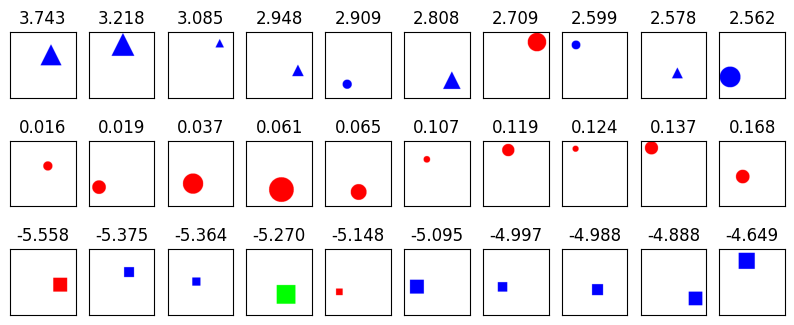

------------------------------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. circular: 0.1383
	2. emerald: 0.1307
	3. fern: 0.1260
	4. no: 0.1238
	5. blank: 0.1233
	6. form: 0.1054
	7. white: 0.1024
	8. transparent: 0.0976
	9. turn: 0.0900
	10. photo: 0.0899
	11. solid: 0.0886
	12. picture: 0.0857
	13. figure: 0.0846
	14. fix: 0.0839
	15. red: 0.0827
	16. color: 0.0761
	17. locate: 0.0724
	18. position: 0.0704
	19. bottom: 0.0695
	20. static: 0.0672
	21. green: 0.0671
	22. shade: 0.0644
	23. unrotate: 0.0634
	24. unturn: 0.0625
	25. it: 0.0619
	26. cherry: 0.0612
	27. canvas: 0.0606
	28. up: 0.0603
	29. right: 0.0546
	30. lime: 0.0545
	31. crimson: 0.0532
	32. ruby: 0.0491
	33. image: 0.0444
	34. background: 0.0426
	35. scarlet: 0.0405
	36. quadratic: 0.0394
	37. rotate: 0.0331
	38. round: 0.0296
	39. four: 0.0242
	40. navy: 0.0242
	41. cyan: 0.0230
	42. three: 0.0169
	43. left: 0.0

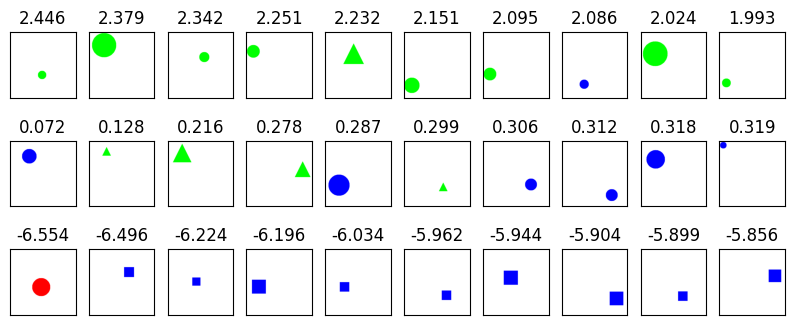

------------------------------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. olive: 0.1250
	2. shape: 0.1241
	3. up: 0.1040
	4. photo: 0.0973
	5. three: 0.0957
	6. left: 0.0927
	7. image: 0.0879
	8. color: 0.0852
	9. background: 0.0840
	10. unturn: 0.0825
	11. static: 0.0813
	12. turn: 0.0792
	13. green: 0.0786
	14. round: 0.0747
	15. transparent: 0.0705
	16. solid: 0.0683
	17. blank: 0.0648
	18. unrotate: 0.0642
	19. right: 0.0591
	20. locate: 0.0577
	21. crimson: 0.0558
	22. azure: 0.0557
	23. it: 0.0537
	24. corner: 0.0527
	25. ruby: 0.0510
	26. blue: 0.0502
	27. red: 0.0493
	28. canvas: 0.0491
	29. fix: 0.0479
	30. white: 0.0469
	31. scarlet: 0.0457
	32. figure: 0.0451
	33. emerald: 0.0416
	34. position: 0.0375
	35. form: 0.0340
	36. shade: 0.0340
	37. picture: 0.0313
	38. navy: 0.0284
	39. cyan: 0.0277
	40. bottom: 0.0277
	41. cherry: 0.0273
	42. lime: 0.0248
	43. circular: 0.0

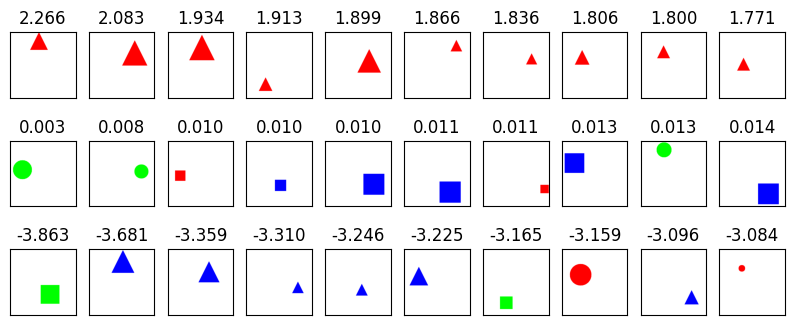

------------------------------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. image: 0.1451
	2. left: 0.1380
	3. green: 0.1227
	4. cherry: 0.1217
	5. unrotate: 0.1184
	6. canvas: 0.1135
	7. olive: 0.1117
	8. background: 0.1109
	9. turn: 0.1081
	10. three: 0.1059
	11. scarlet: 0.0994
	12. static: 0.0913
	13. round: 0.0901
	14. it: 0.0869
	15. fix: 0.0857
	16. photo: 0.0838
	17. blank: 0.0808
	18. right: 0.0802
	19. navy: 0.0759
	20. red: 0.0741
	21. azure: 0.0726
	22. solid: 0.0721
	23. lime: 0.0712
	24. color: 0.0698
	25. up: 0.0689
	26. figure: 0.0688
	27. crimson: 0.0649
	28. position: 0.0619
	29. unturn: 0.0600
	30. white: 0.0595
	31. corner: 0.0575
	32. emerald: 0.0557
	33. transparent: 0.0520
	34. shape: 0.0486
	35. circular: 0.0480
	36. shade: 0.0459
	37. cyan: 0.0457
	38. locate: 0.0452
	39. ruby: 0.0447
	40. picture: 0.0446
	41. blue: 0.0429
	42. fern: 0.0410
	43. rotate: 0.0

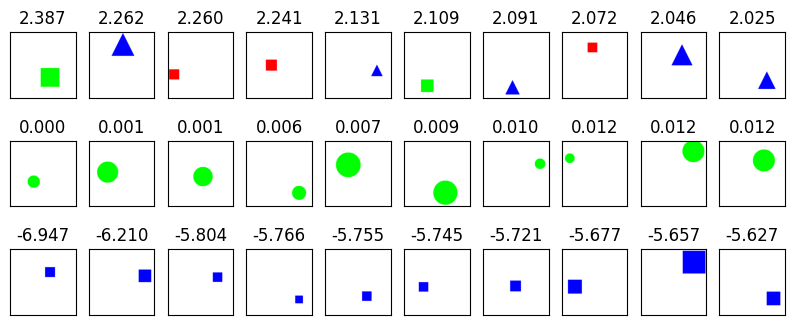

------------------------------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. lime: 0.2157
	2. round: 0.1452
	3. quadratic: 0.1279
	4. cherry: 0.1217
	5. azure: 0.1129
	6. navy: 0.1053
	7. lapis: 0.1023
	8. figure: 0.1020
	9. left: 0.0993
	10. background: 0.0959
	11. green: 0.0917
	12. scarlet: 0.0916
	13. fix: 0.0858
	14. color: 0.0845
	15. picture: 0.0802
	16. emerald: 0.0800
	17. image: 0.0753
	18. position: 0.0722
	19. it: 0.0715
	20. canvas: 0.0695
	21. white: 0.0680
	22. static: 0.0639
	23. right: 0.0616
	24. unturn: 0.0603
	25. fern: 0.0599
	26. cyan: 0.0580
	27. turn: 0.0561
	28. solid: 0.0537
	29. transparent: 0.0510
	30. bottom: 0.0454
	31. crimson: 0.0449
	32. blue: 0.0421
	33. four: 0.0417
	34. unrotate: 0.0416
	35. up: 0.0410
	36. ruby: 0.0401
	37. red: 0.0372
	38. shade: 0.0362
	39. corner: 0.0351
	40. circular: 0.0333
	41. locate: 0.0329
	42. blank: 0.0305
	43. photo: 

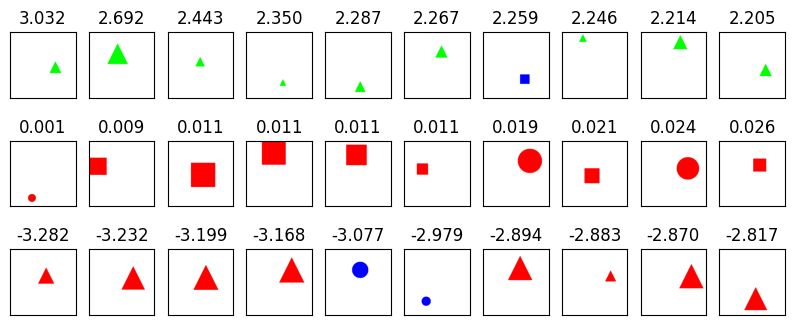

------------------------------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. blue: 0.1744
	2. azure: 0.1423
	3. lapis: 0.1245
	4. cyan: 0.1197
	5. quadratic: 0.0627
	6. triangular: 0.0585
	7. four: 0.0465
	8. round: 0.0295
	9. angle: 0.0292
	10. ruby: 0.0187
	11. corner: 0.0157
	12. bottom: 0.0093
	13. unturn: 0.0069
	14. lime: 0.0018
	15. position: 0.0018
	16. navy: 0.0016
	17. shape: 0.0008
	18. locate: 0.0008
	19. crimson: 0.0006
	20. picture: 0.0005
	21. shade: 0.0005
	22. it: 0.0004
	23. left: 0.0003
	24. form: 0.0003
	25. up: 0.0002
	26. transparent: 0.0001
	27. right: 0.0000
	28. background: 0.0000
	29. circular: 0.0000
	30. cherry: 0.0000
	31. red: 0.0000
	32. fern: 0.0000
	33. olive: 0.0000
	34. green: 0.0000
	35. emerald: 0.0000
	36. scarlet: 0.0000
	37. three: 0.0000
	38. no: 0.0000
	39. fix: 0.0000
	40. turn: 0.0000
	41. blank: 0.0000
	42. color: 0.0000
	43. static: 0.00

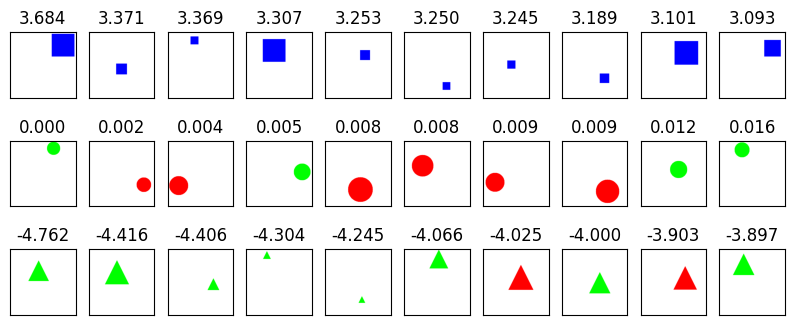

------------------------------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. shape: 0.3041
	2. three: 0.1925
	3. olive: 0.1921
	4. blue: 0.1263
	5. up: 0.0933
	6. cyan: 0.0582
	7. locate: 0.0512
	8. form: 0.0412
	9. azure: 0.0338
	10. ruby: 0.0334
	11. static: 0.0281
	12. unturn: 0.0273
	13. left: 0.0248
	14. round: 0.0168
	15. it: 0.0157
	16. transparent: 0.0141
	17. background: 0.0086
	18. crimson: 0.0075
	19. corner: 0.0073
	20. position: 0.0059
	21. lapis: 0.0058
	22. solid: 0.0042
	23. bottom: 0.0041
	24. emerald: 0.0031
	25. shade: 0.0031
	26. unrotate: 0.0027
	27. rotate: 0.0027
	28. photo: 0.0026
	29. right: 0.0016
	30. angle: 0.0015
	31. color: 0.0012
	32. green: 0.0007
	33. fern: 0.0007
	34. image: 0.0004
	35. triangular: 0.0004
	36. turn: 0.0002
	37. white: 0.0001
	38. blank: 0.0001
	39. fix: 0.0000
	40. figure: 0.0000
	41. quadratic: 0.0000
	42. circular: 0.0000
	43. fo

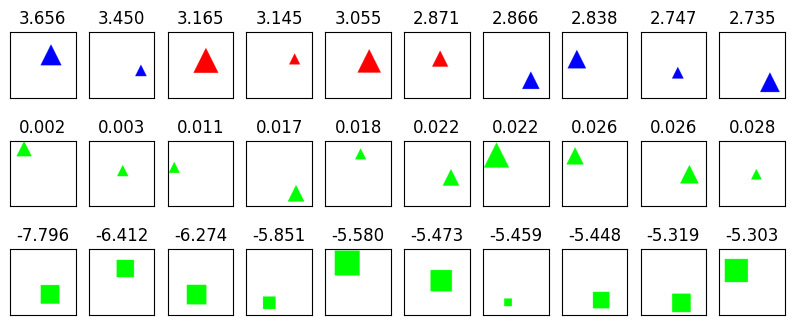

------------------------------------------------------------------------------------------------------------------------
Concept #11

Top-k tokens w.r.t. average attention score:
	1. fern: 0.1163
	2. no: 0.0999
	3. circular: 0.0936
	4. transparent: 0.0925
	5. form: 0.0904
	6. white: 0.0766
	7. rotate: 0.0709
	8. blank: 0.0708
	9. locate: 0.0690
	10. emerald: 0.0663
	11. bottom: 0.0654
	12. shade: 0.0646
	13. photo: 0.0619
	14. up: 0.0617
	15. ruby: 0.0592
	16. unturn: 0.0570
	17. solid: 0.0556
	18. picture: 0.0524
	19. red: 0.0511
	20. position: 0.0507
	21. crimson: 0.0503
	22. it: 0.0484
	23. fix: 0.0480
	24. right: 0.0468
	25. color: 0.0461
	26. cyan: 0.0435
	27. figure: 0.0434
	28. turn: 0.0427
	29. unrotate: 0.0406
	30. static: 0.0361
	31. angle: 0.0320
	32. canvas: 0.0270
	33. four: 0.0234
	34. scarlet: 0.0227
	35. background: 0.0198
	36. corner: 0.0173
	37. navy: 0.0163
	38. quadratic: 0.0128
	39. triangular: 0.0117
	40. green: 0.0108
	41. cherry: 0.0086
	42. shape: 0.0076
	43. l

IndexError: list index out of range

In [5]:
for i in range(51):
    visualize_concept(i)